In [1]:
"""
Name: example_calibration_analysis.ipynb
Authors: Stephan Meighen-Berger
Shows an example calibration analysis
"""

'\nName: example_calibration_analysis.ipynb\nAuthors: Stephan Meighen-Berger\nShows an example calibration analysis\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from tqdm import tqdm
from scipy.interpolate import UnivariateSpline

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['class'] = 'Calibration'
config['scenario']['light prop'] = {
            "switch": True,
            "x_pos": 5.,
            "y_pos": 10.,
        }
config['scenario']['detector'] = {
    "switch": True,
    "type": "PMTSpec_Func",
    "response": True,
    "acceptance": "Flat",
    "mean detection prob": 1.
}
# The flasher position
config['calibration']['pos_arr'] = [2., 30.]
# The injected pulse
config['calibration']['light curve'] = {
    396.: np.ones(100),
    400.: np.ones(100),
    506.: np.ones(100),
    514.: np.ones(100),
    545.: np.ones(100),
    550.: np.ones(100),
}

In [7]:
samples = 50
sim_counts = []
for sample in tqdm(range(samples)):
    # Varying the angle pointing by 1%
    angle_offset_var = np.random.uniform(-0.01, 0.01, 12)
    # Varying the opening angle by 1%
    angle_opening_var = np.random.uniform(-0.01, 0.01, 12)
    # Varying the quantum efficiency functions by 5%
    qe_var = np.random.uniform(-0.01, 0.01, (12, 3))
    # Varying the attenuation curve by 10 % at each point
    atten_var = np.random.uniform(-0.15, 0.15, 23)
    config['geometry']['detector properties']["PMTSpec_Func"] = {
        "x_pos": 2.,
        "y_pos": 5.,
        "det num": 12, #12 pmts numbered by position 
        "x_offsets": np.array(
            [0.1,0.,-0.1,0., 0.12,-0.12,-0.12,0.12, 0.2,-0.04,-0.2,0.04]
        ) / 2., #test radius 0.3 meter, real radius 0.15 meter
        "y_offsets": np.array(
            [0.,0.1,0.,-0.1,  0.12,0.12,-0.12,-0.12, 0.04,0.2,-0.04,-0.2]
        ) / 2.,
        "angle offset": np.array([
            90., 90., 90., 90., 90., 90.,
            90., 90., 90., 90., 90., 90.]) * (1. + angle_offset_var),  # In which direction the detector(s) points
        "opening angle": np.array([
            25., 25., 25., 25., 25., 25.,
            25., 25., 25., 25., 25., 25.]) * (1. + angle_opening_var),  # 25., # from dark box rotation test result: +-25 degrees
        "quantum efficiency": "Func",  # whether flat or function
        "wavelength acceptance": np.array([ #position number,center wavelength,quantum efficiency (if flat)
            [395., 405.],
            [505., 515.],
            [420., 430.],
            [465., 475.],
            [300., 600.],
            [487., 497.],
            [540., 560.],
            [515., 535.],
            [475., 485.],
            [445., 455.],
            [455., 465.],
            [325., 375.],                                     
        ]),
        "quantum func": np.array([
            [[395., 400., 405.], np.array([0.26, 0.26, 0.26]) * (1. + qe_var[0])],
            [[505., 510., 515.], np.array([0.16, 0.16, 0.16]) * (1. + qe_var[1])],
            [[420., 425., 430.], np.array([0.28, 0.28, 0.28]) * (1. + qe_var[2])],
            [[465., 470., 475.], np.array([0.23, 0.23, 0.23]) * (1. + qe_var[3])],
            [[300., 500., 600.], np.array([1., 1., 1.]) * (1. + qe_var[4])],
            [[487., 490., 497.], np.array([0.1, 0.1, 0.1]) * (1. + qe_var[5])],
            [[540., 550., 560.], np.array([0.1, 0.1, 0.1]) * (1. + qe_var[6])],
            [[515., 525., 535.], np.array([0.13, 0.13, 0.13]) * (1. + qe_var[7])],
            [[475., 480., 485.], np.array([0.2, 0.2, 0.2]) * (1. + qe_var[8])],
            [[445., 450., 455.], np.array([0.2, 0.2, 0.2]) * (1. + qe_var[9])],
            [[455., 460., 465.], np.array([0.23, 0.23, 0.23]) * (1. + qe_var[10])],
            [[325., 350., 375.], np.array([0.3, 0.3, 0.3]) * (1. + qe_var[11])],
        ])
    }
    config['calibration']['attenuation curve'] = np.array([
        [
            299.,
            329.14438502673795, 344.11764705882354, 362.2994652406417,
            399.44415494181, 412.07970421102266, 425.75250006203635,
            442.53703565845314, 457.1974490682151, 471.8380108687561,
            484.3544504826423, 495.7939402962853, 509.29799746891985,
            519.6903148961513, 530.0627807141617, 541.5022705278046,
            553.9690811186382, 567.4929899004939, 580.9771954639073,
            587.1609717362714, 593.3348222040249, 599.4391920395047,
            602.4715253480235
        ],
        np.array([
            0.8,
            0.6279453220864465,0.3145701363176568,
            0.12591648888305143,0.026410321551339357, 0.023168667048510762,
            0.020703255370450736, 0.019552708373076478,
            0.019526153330089138, 0.020236306473695613,
            0.02217620815962483, 0.025694647290888873,
            0.031468126242251794, 0.03646434475343956,
            0.04385011375530569, 0.05080729755501162,
            0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
            0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
            0.23106528395398912
        ]) * (1. + atten_var)
    ])
    # Creating a fourth_day object
    fd = Fourth_Day()
    # Launching solver
    fd.sim()
    sim_counts.append(fd.measured)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.39it/s]


In [8]:
spl_atten = UnivariateSpline(
    [
        299.,
        329.14438502673795, 344.11764705882354, 362.2994652406417,
        399.44415494181, 412.07970421102266, 425.75250006203635,
        442.53703565845314, 457.1974490682151, 471.8380108687561,
        484.3544504826423, 495.7939402962853, 509.29799746891985,
        519.6903148961513, 530.0627807141617, 541.5022705278046,
        553.9690811186382, 567.4929899004939, 580.9771954639073,
        587.1609717362714, 593.3348222040249, 599.4391920395047,
        602.4715253480235
    ],
    np.array([
        0.8,
        0.6279453220864465,0.3145701363176568,
        0.12591648888305143,0.026410321551339357, 0.023168667048510762,
        0.020703255370450736, 0.019552708373076478,
        0.019526153330089138, 0.020236306473695613,
        0.02217620815962483, 0.025694647290888873,
        0.031468126242251794, 0.03646434475343956,
        0.04385011375530569, 0.05080729755501162,
        0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
        0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
        0.23106528395398912
    ]), k=1, s=0
)

In [9]:
# Distances
distances = np.array([
    (config['calibration']['pos_arr'][0] - (fd._lucifer._det_geom['x_pos'] + fd._lucifer._det_geom["x_offsets"][i]))**2. +
    (config['calibration']['pos_arr'][1] - (fd._lucifer._det_geom['y_pos'] + fd._lucifer._det_geom["y_offsets"][i]))**2.
    for i in range(0, fd._lucifer._det_geom["det num"])])**(1./2.)
# Attenuation function
def atten_func(distance, atten):
    factor = np.exp(-distance * atten) / (4. * np.pi * distance**2.)
    if factor > 1./2.:
        factor = 1./2.
    return factor
def dist_atten(distance):
    return (4. * np.pi * distance**2.)

In [10]:
# Plotting standards
std_size = 6.
fontsize = 20.
lw=1.
h_length=0.2

In [11]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

1.0167885311780664
1.0107648122636774
1.0062376418825971


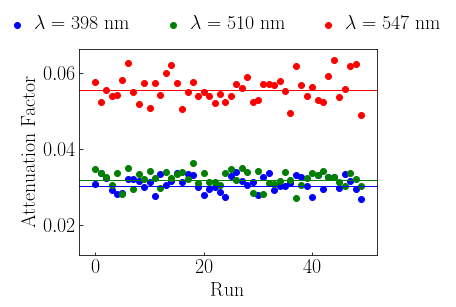

In [13]:
# Detector 0 evaluation
norm_fac = 1.
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
det = 'Detector 0'
for sample in sim_counts:
    atten_facs = np.array([np.mean(-np.log(sample[det].values * dist_atten(distances[0]) / 4. / 0.26) / distances[0])
                           for sample in sim_counts])
ax1.scatter(
    range(len(sim_counts)), atten_facs / norm_fac, label=r'$\lambda = 398\;\mathrm{nm}$', color='b',
)
print(np.mean(atten_facs) / spl_atten(398.))
det = 'Detector 1'
for sample in sim_counts:
    atten_facs = np.array([np.mean(-np.log(sample[det].values * dist_atten(distances[1]) / 8. / 0.16) / distances[1])
                           for sample in sim_counts])
ax1.scatter(
    range(len(sim_counts)), atten_facs / norm_fac, label=r'$\lambda = 510\;\mathrm{nm}$', color='g',
)
print(np.mean(atten_facs) / spl_atten(510.))
det = 'Detector 6'
for sample in sim_counts:
    atten_facs = np.array([np.mean(-np.log(sample[det].values * dist_atten(distances[2]) / 5. / 0.1) / distances[2])
                           for sample in sim_counts])
ax1.scatter(
    range(len(sim_counts)), atten_facs / norm_fac, label=r'$\lambda = 547\;\mathrm{nm}$', color='r',
)
print(np.mean(atten_facs) / spl_atten(547.))
ax1.axhline(spl_atten(398.), color='b', lw=lw)
ax1.axhline(spl_atten(510.), color='g', lw=lw)
ax1.axhline(spl_atten(547.), color='r', lw=lw)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$\mathrm{Run}$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Attenuation\;Factor}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.25),
                  ncol=6, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
# ax1.set_xlim(390., 400)
plt.tight_layout()
plt.show()
figure.savefig(PICS + "Calibration_Pop.png",
               bbox_inches='tight')